In [5]:
#
# the Pillow (PIL) library supports image reading and writing
#     these functions make sure that the pixels are 
#     in "canonical" image form:
#     each image's rgbdata is
#         a list... of lists (rows)
#     each row is
#         a list... of lists (pixels)
#     each pixel is
#         a list of three integers:  [r,g,b], each from 0-255 (inclusive)
#

# see examples in the cells below

from PIL import Image
import time

def saveRGB( PX, filename="out.png" ):
    """ saves a list-of-lists-of-lists of rgb pixels where
        len(PX) == the # of rows
        len(PX[0]) == the # of columns
        len(PX[0][0]) should be 3 (rgb)
    """
    boxed_pixels = PX
    print( 'Starting to save', filename, '...' )
    W, H = getWH( boxed_pixels )
    im = Image.new("RGB", (W, H), "black")
    px = im.load()
    for r in range(H):
        #print( ".", end="" )
        for c in range(W):
            bp = boxed_pixels[r][c]
            t = tuple(bp)
            px[c,r] = t
    im.save( filename )
    time.sleep(0.42)   # give the filesystem some time...
    print( filename, "saved." )

def getRGB( filename="spam.png" ):
    """ reads a png or jpg file 
        returns the pixels as a list-of-lists-of-lists
        this is accessible, but not fast: Use small images!
    """
    original = Image.open(filename)
    print(f"Reading image from {filename} :")
    print(f"  Format: {original.format}\n  Size: {original.size}\n  Mode: {original.mode}")
    WIDTH, HEIGHT = original.size
    px = original.load()
    PIXEL_LIST = []
    for r in range(HEIGHT):
        row = []
        for c in range(WIDTH):
            row.append( px[c,r][:3] )
        PIXEL_LIST.append( row )
    return PIXEL_LIST

def getWH( PX ):
    """ returns the width and height (in pixels) 
        height = # of rows (# of top-level elements)
        width = # of columns (# of elements inside each top-level element)
    """
    H = len(PX)
    W = len(PX[0])
    return W, H

def binaryIm( s, cols=8, rows=8 ):
    """ returns rgb values for an image with
        rows (number of rows)
        cols (number of cols)
        from the string s (of only 0's and 1's)
    """
    PX = []
    for row in range(rows):
        ROW = []
        for col in range(cols):
            c = int(s[row*cols + col])*255
            px = [ c, c, c ]
            ROW.append( px )
        PX.append( ROW )
    #saveRGB( PX, 'binary.png' )
    return PX
    

[[[255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0]], [[0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255]], [[255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0]], [[0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255]], [[255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0]], [[0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255]], [[255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0]], [[0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255], [0, 0, 0], [255, 255, 255]]]


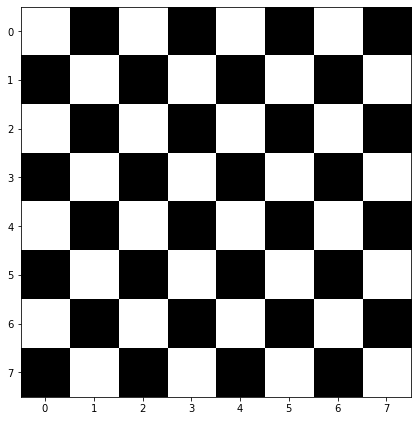

In [6]:
#
# example of how to use the binaryIm function
#
s = '1010101001010101'*4   # checkerboard!
PX = binaryIm(s,8,8)       # converted to pixels
print(PX)                  # printed as numbers
show_image(PX)             # shown as an image...

In [7]:
#
# matplotlib is a commonly used Python graphing library
#

# allows us to use plt as the library name
import matplotlib.pyplot as plt  

#
# helper function to allow setting the image size
#
def set_size(width, height, ax=None):
    """ w, h: width, height in inches """
    w = width; h = height
    if not ax: ax=plt.gca()  # gets current axes
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
#
# wrapper for matplotlib's imshow function
#
def show_image( rgbdata, hgt_in=5.42, wid_in=5.42 ):
    """ shows an image whose pixels are in rgbdata 
        note:  rgbdata is a list-of-rows-of-pixels-of-rgb values, _not_ a filename!
        hgt_in is the desired height (in inches)
        wid_in is the desired width (in inches)
        _but_ the library will not change the aspect ratio (takes the smaller)
        by default, the hgt_in and wid_in are 5.42 in.
    """
    fig, ax = plt.subplots()           # obtains the figure and axes objects
    im = ax.imshow(rgbdata)            # this is matplotlib's call to show an image 
    set_size(width=wid_in, height=hgt_in)  # matplotlib will maintain the image's aspect ratio
    # ax.axis('off')   # turns off the axes (in units of pixels)
    plt.show()

In [8]:
# images provided:  flag.png hopper.jpg olin.png spam.jpg in.png out.png
rgbdata = getRGB( "olin.png" )

Reading image from olin.png :
  Format: PNG
  Size: (306, 240)
  Mode: RGB


In [9]:
#
# building intuition of the image as a list-of-lists-of-lists:
# 

# each top-level element is one row:
print(rgbdata[42])

[(42, 72, 145), (6, 39, 120), (5, 42, 130), (1, 42, 132), (1, 43, 129), (2, 44, 126), (2, 44, 128), (0, 43, 130), (0, 40, 127), (3, 43, 130), (1, 41, 128), (0, 40, 127), (1, 41, 128), (3, 40, 128), (3, 40, 128), (2, 39, 127), (3, 41, 126), (3, 41, 126), (3, 41, 126), (3, 40, 128), (2, 40, 125), (2, 40, 125), (1, 39, 122), (1, 39, 122), (1, 39, 120), (1, 39, 120), (1, 39, 120), (0, 40, 120), (1, 39, 120), (1, 39, 120), (0, 37, 118), (0, 37, 118), (0, 35, 117), (0, 35, 117), (0, 35, 117), (0, 35, 116), (1, 36, 117), (1, 36, 117), (1, 36, 117), (1, 36, 117), (1, 36, 117), (1, 36, 117), (1, 36, 117), (1, 36, 117), (1, 36, 117), (0, 33, 114), (1, 34, 115), (4, 37, 118), (0, 31, 112), (0, 33, 114), (1, 34, 115), (1, 34, 115), (2, 35, 116), (0, 33, 114), (0, 33, 114), (0, 33, 114), (1, 34, 115), (1, 34, 115), (2, 35, 116), (2, 35, 116), (1, 34, 115), (1, 34, 115), (0, 33, 114), (0, 33, 114), (0, 33, 114), (0, 33, 114), (1, 34, 115), (2, 35, 116), (0, 33, 114), (0, 33, 114), (0, 33, 114), (0, 

In [10]:
#
# each row's elements are individual pixels:
#
print(rgbdata[42][42])

# we can change them!
rgbdata[42][42] = [255,0,0]  # 255 is red, 0 is green, 0 is blue 

(1, 36, 117)


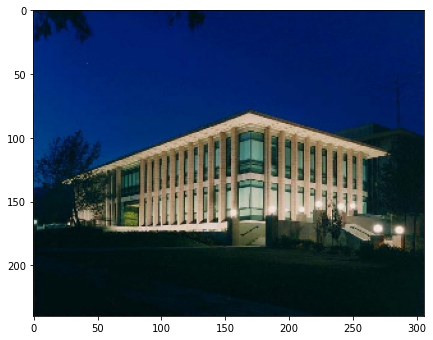

In [11]:
#
# display the image with show_image
#
show_image( rgbdata )  # default size

# show_image( rgbdata, 10, 10 )  # much larger

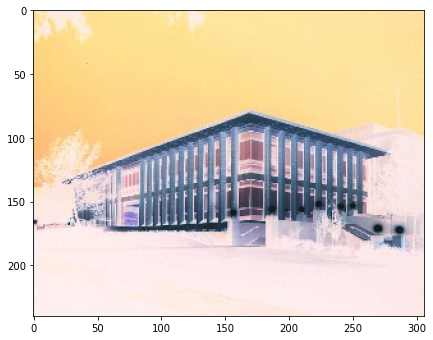

In [12]:
#
# First pixel-processing example:   "Invert" the image (255 - each color)
#

def new_pixel( rgbpixel ):
    """ rgbpixel should be in the form [r,g,b]
        returns [newred, newgreen, new blue],
        based on their old versions!
    """
    [r,g,b] = rgbpixel
    newr = 255-r
    newg = 255-g
    newb = 255-b
    return [newr, newg, newb]

def transform_image( rgbdata ):
    """ transforms an image, returning a new image 
        applies the function new_pixel to each pixel
    """
    new_rgbdata = [[ new_pixel(pix) for pix in row] for row in rgbdata]
    return new_rgbdata

new_rgbdata = transform_image(rgbdata)

show_image(new_rgbdata)

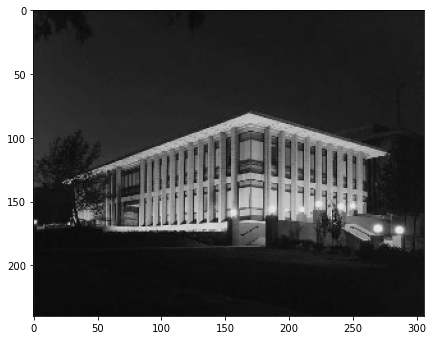

In [22]:
def gray_pixel( rgbpixel ):
    """ gray_pixel should be in the form [r,g,b]
        returns [newred, newgreen, new blue],
        based on their old versions!
        
        Takes a pixel and makes it grayscale.
    """
    [r,g,b] = rgbpixel
    luminance=(r*0.21+g*0.72+b*0.07)
    luminance=int(luminance//1)
    newr = luminance
    newg = luminance
    newb = luminance
    
    return [newr, newg, newb]

def grayscale( rgbdata ):
    """ transforms an image, returning a new image that is the old image in grayscale
        applies the function gray_pixel to each pixel
    """
    new_rgbdata = [[ gray_pixel(pix) for pix in row] for row in rgbdata]
    return new_rgbdata

new_rgbdata = grayscale(rgbdata)

show_image(new_rgbdata)
#print(gray_pixel([200,155,15]))

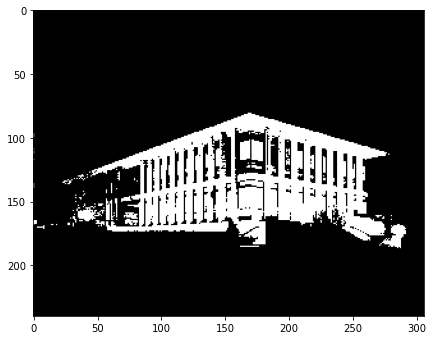

In [28]:
def binarize_pixel( rgbpixel, threshold_pixel ):
    """ binarize_pixel should be in the form [r,g,b]
        returns [newred, newgreen, new blue],
        based on their old versions!
        
        Takes a pixel and makes it either black or white, depending on whether it's luminance is bigger than the threshold value.
    """
    [r,g,b] = rgbpixel
    luminance=(r*0.21+g*0.72+b*0.07)
    luminance=int(luminance//1)
    if(threshold_pixel>luminance):
        newr = 0
        newg = 0
        newb = 0
    else:
        newr=255
        newg=255
        newb=255
    
    return [newr, newg, newb]

def binarize( rgbdata,thresh ):
    """ transforms an image, returning a new image that is the old image, binarized in black and white, based off of whether each pixel's luminance is greater than or less than the input value thresh.
        applies the function binarize_pixel to each pixel
    """
    new_rgbdata = [[ binarize_pixel(pix, thresh) for pix in row] for row in rgbdata]
    return new_rgbdata

new_rgbdata = binarize(rgbdata, 92)

show_image(new_rgbdata)
#print(gray_pixel([200,155,15]))

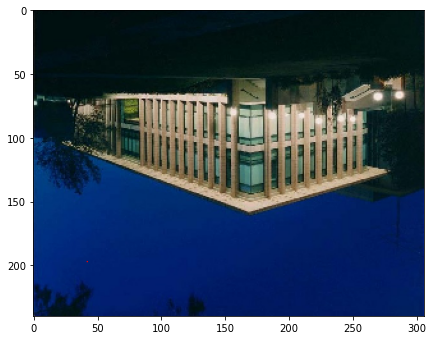

In [30]:
def flipVertHelper(rgbdata, row):
    """ flipVertHelper 
        Takes a pixel and makes it equal to the pixel directly across the horizontal axis from it.
    """
    
    
    return row

def flipVert(rgbdata):
    """
    flips the image on its horizontal axis.
    """
    new_rgbdata = [ flipVertHelper (rgbdata, row) for row in rgbdata[::-1]]
    return new_rgbdata

new_rgbdata = flipVert(rgbdata)

show_image(new_rgbdata)

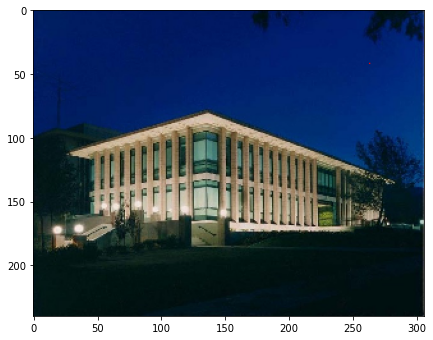

In [34]:
def flipHorizHelper(row):
    """ flipHorizHelper 
        Takes a pixel and makes it equal to the pixel directly across the vertical axis from it.
    """
    
    return row[::-1]

def flipHoriz(rgbdata):
    """
    flips the image on its vertical axis.
    """
    new_rgbdata = [ flipHorizHelper (row) for row in rgbdata]
    return new_rgbdata

new_rgbdata = flipHoriz(rgbdata)

show_image(new_rgbdata)

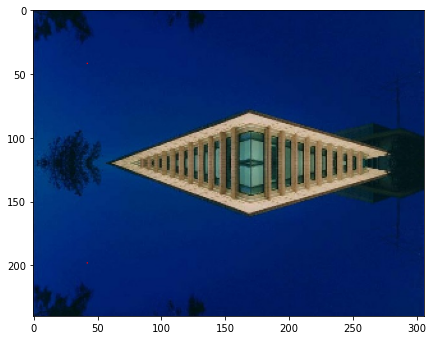

In [46]:
def flipVertHelper(rgbdata, row):
    """ flipVertHelper 
        Takes a pixel and makes it equal to the pixel directly across the horizontal axis from it.
    """
    
    
    return row

def mirrorVert(rgbdata):
    """
    mirrors the photo actoss its horizontal axis.
    """
    w,h=getWH(rgbdata)
    half_height=int(h//2)
    new_rgbdata = [ flipVertHelper (rgbdata, row) for row in rgbdata[half_height:0:-1]]
    return rgbdata[0:half_height]+new_rgbdata

new_rgbdata = mirrorVert(rgbdata)

show_image(new_rgbdata)

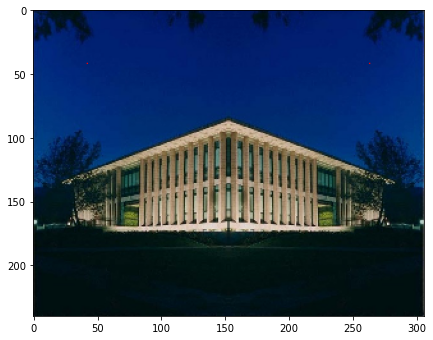

In [49]:
def mirrorHorizHelper(row, halfwid):
    """ mirrorHorizHelper 
        Takes a row and makes it mirrored (first half forwards, then first half backwards)
    """
    
    return row[0:halfwid]+row[(halfwid-1)::-1]

def mirrorHoriz(rgbdata):
    """
    mirrors the image on its vertical axis.
    """
    w,h=getWH(rgbdata)
    half_width=int(w//2)
    new_rgbdata = [ mirrorHorizHelper (row, half_width) for row in rgbdata]
    return new_rgbdata

new_rgbdata = mirrorHoriz(rgbdata)

show_image(new_rgbdata)

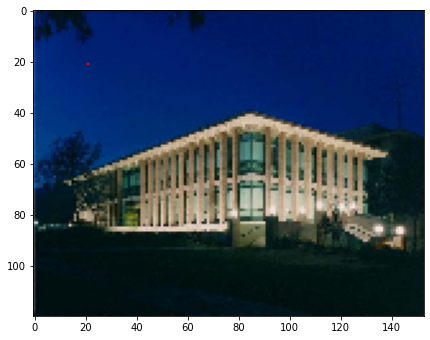

In [51]:
def scaleHelper(pix):
    """ scaleHelper: returns the pix (only called for every other pixel for every other row) 
    
    """
    return pix

def scale(rgbdata):
    """
    Scales the image to half of its original dimensions
    """
    
    new_rgbdata = [[ scaleHelper(pix) for pix in row[::2]] for row in rgbdata[::2]]
    return new_rgbdata

new_rgbdata = scale(rgbdata)

show_image(new_rgbdata)

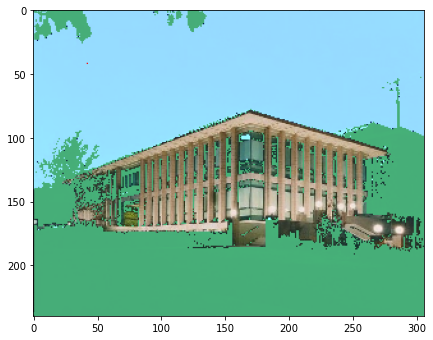

In [77]:
from math import *
def create_day_helper( rgbpixel ):
    """ gray_pixel should be in the form [r,g,b]
        returns [newred, newgreen, new blue],
        based on their old versions!
        
        Takes a pixel and makes it light blue if it is darkblue.
    """
    [r,g,b] = rgbpixel
    newr=r
    newg=g
    newb=b
    if(b>(2*r) and b>g and b>50 and (r+b+g<400) and (r+b+g>110)):
        newr = 150
        newg = 255-(int(((b-g)/b)*50))
        newb = 255
    
    elif((r+b+g<110)):
        newr=70
        newg=170+int((75* ((g)/355)))
        newb=120
    
    
    return [newr, newg, newb]

def create_day( rgbdata ):
    """ transforms an image, taking a night time sky into a daytime sky.
    """
    new_rgbdata = [[ create_day_helper(pix) for pix in row] for row in rgbdata]
    return new_rgbdata

new_rgbdata = create_day(rgbdata)

show_image(new_rgbdata)
#print(gray_pixel([200,155,15]))